Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial

Generate artificial data

In [2]:
np.random.seed(0)
N = 30
X1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]],N)
X1 = np.concatenate((X1,1.0*np.ones((N,1))),axis=1)
X2 = np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],N)
X2 = np.concatenate((X2,2.0*np.ones((N,1))),axis=1)
X3 = np.random.multivariate_normal([2,0],[[1,0],[0,1]],N)
X3 = np.concatenate((X3,3.0*np.ones((N,1))),axis=1)
X = np.concatenate((X1,X2,X3));

Select cluster count

In [3]:
K=3

Select and plot (random) initial guess for cluster assignment

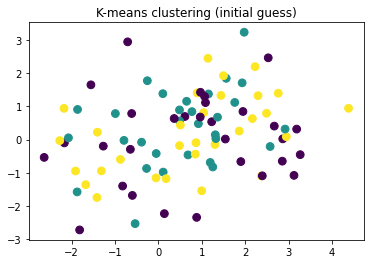

In [4]:
C = np.arange(3*N)
C=np.random.permutation(C)
C = np.array_split(C,K)
for k in range(K):
    X[C[k],2] = k

plt.figure()
plt.scatter(X[:,0],X[:,1],c=X[:,2], s=60)
plt.title("K-means clustering (initial guess)")
plt.show()



Main iteration of K-means clustering (with visualization of output)

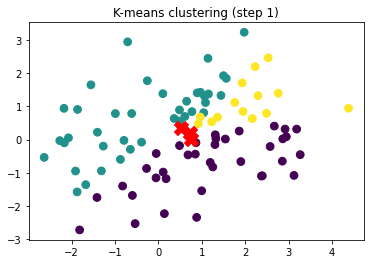

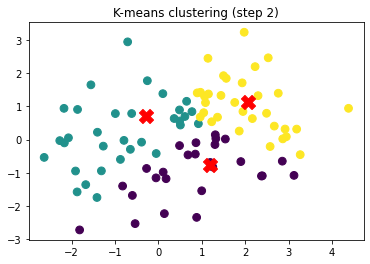

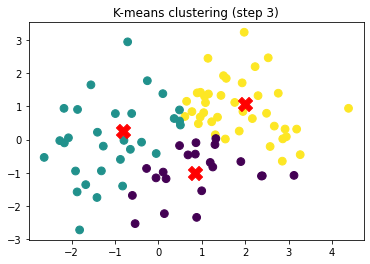

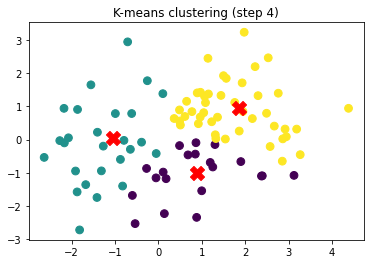

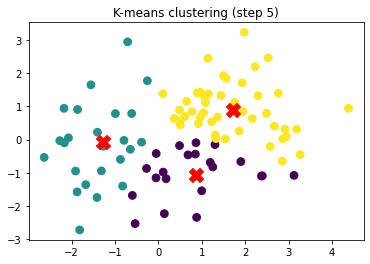

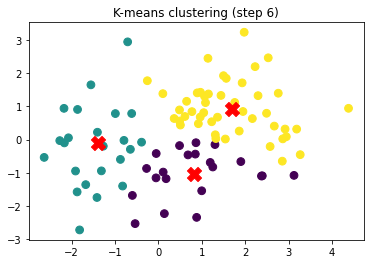

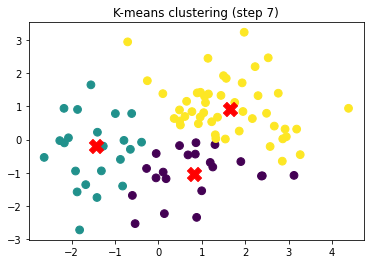

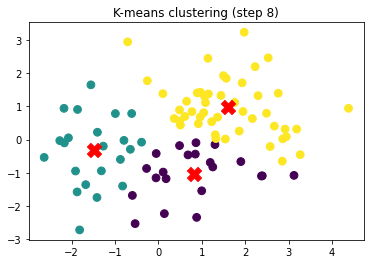

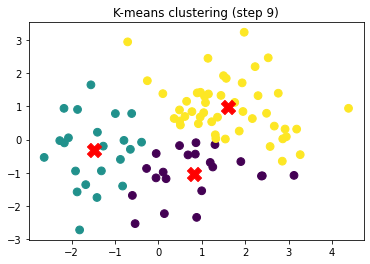

In [5]:
centroids_old = np.ones([K,2])
centroids = np.zeros([K,2])

s=1

while (not np.allclose(centroids_old,centroids)):
    centroids_old = np.copy(centroids)

    for k in range(K):
        cluster_k = X[C[k],:]
        cluster_k = cluster_k[:,[0,1]]
        centroids[k,:] = np.sum(cluster_k, axis=0)/cluster_k.shape[0]

#    plt.figure()
#    plt.scatter(X[:,0],X[:,1],c=X[:,2])
#    plt.scatter(centroids[:,0],centroids[:,1], s=200,marker='X', c='r')
#    plt.title("K-means clustering (step %d, new centroids)"%(s))
#    plt.show()
    
    C = []
    dist = spatial.distance_matrix(X[:,:2],centroids)
    new_cluster_ids = np.argmin(dist,axis=1)
    indices = np.arange(N*3)
    for k in range(K):
        C.append(np.asarray(indices[new_cluster_ids==k]))
    for k in range(K):
        X[C[k],2] = k

    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=X[:,2],s=60)
    plt.scatter(centroids[:,0],centroids[:,1], s=200,marker='X', c='r')
    plt.title("K-means clustering (step %d)"%(s))
    plt.show()
    
    s=s+1